## 🎶 MUSIC THERAPY ON MENTAL HEALTH 🎶

The Music and Health dataset wants to recognize if there are any existing connections between a person's taste in music and their self-reported mental health. The aim of this project is to build a model that will help predict the effects of music on a person based on a few predictors and to know if Music Therapy helps in preventing or aiding mental conditions.

In [1]:
# Importing libraries

# Visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

## 💥 Data Information

The raw data is was collected through Google form and uploaded as csv file on [Kaggle Music & Mental Health Survey Results](https://www.kaggle.com/code/hazigin/music-mental-health-survey-results-eda/data). There are 736 rows and 33 columns in the dataset.
#### Column names with corresponding descriptions:
- **Timestamp** - Date and Time when form was submitted
- **Age** - Age of respondent
- **Primary Streaming Service** - Respondent's primary streaming service
- **While working** - Respondent is listening to music while studying or working
- **Instrumentalist** - Respondent plays any instrument regularly
- **Composer** - Respondent composes music
- **Fav Genre** - Respondent's favorite genre
- **Exploratory** - Respondent explores new genres'artist regularly
- **Foreign Languages** - Respondent listens to songs that are in foreign language
- **BPM** - Beats per minute of respondent's favorite genre
- **Frequency [Genre]** - Frequency of listening to the genre given
- **Anxiety** - On a scale of 0-10, self-reported anxiety
- **Depression** - On a scale of 0-10, self-reported depression
- **Insomnia** - On a scale of 0-10, self-reported insomnia
- **OCD** - On a scale of 0-10, self-reported OCD
- **Music Effects** - Does music improve or worsen the mental health conditions of the respondent
- **Permissions** - Permission to publicize data


In [2]:
# Importing the dataset

df = pd.read_csv("mxmh_survey_results.csv")
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


## 💥 Data Cleansing

In [3]:
# Checking for Null values

df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [4]:
# Replacing all null values in BPM with its average

df["BPM"].fillna(value=df["BPM"].mean(), inplace=True)

In [5]:
# Dropping all null and duplicate values
df = df.dropna()
df.drop_duplicates()

print("Null values in the dataset:", df.isnull().sum().sum())

Null values in the dataset: 0


In [6]:
# Replacing long text

df["Primary streaming service"] = df["Primary streaming service"].str.replace('I do not use a streaming service.','None')
df["Primary streaming service"] = df["Primary streaming service"].str.replace('Other streaming service','Others')

/var/folders/4z/4fnbcwgx255_302rtjw9gg8c0000gn/T/ipykernel_26140/3503770265.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Primary streaming service"] = df["Primary streaming service"].str.replace('I do not use a streaming service.','None')
/var/folders/4z/4fnbcwgx255_302rtjw9gg8c0000gn/T/ipykernel_26140/3503770265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Primary streaming service"] = df["Primary streaming service"].str.replace('I do not use a streaming service.','None')
/var/folders/4z/4fnbcwgx255_302rtjw9gg8c0000gn/T/ipykernel_26140/3503770265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [7]:
# Checking for the types of columns

df.dtypes

# Converting time to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

/var/folders/4z/4fnbcwgx255_302rtjw9gg8c0000gn/T/ipykernel_26140/4152485923.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Timestamp"] = pd.to_datetime(df["Timestamp"])


In [8]:
# Getting the description of the numerical column data 
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,718.000000,718.000000,7.180000e+02,718.000000,718.000000,718.000000,718.000000
mean,25.176880,3.578064,1.618734e+06,5.837744,4.806407,3.717967,2.635097
std,11.953918,3.017779,3.731536e+07,2.784533,3.020061,3.084387,2.844382
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.050000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.280000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.627500e+02,8.000000,7.000000,6.000000,4.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


## 💥 Data Visualization

#### 🟣 DISTRIBUTION OF FAVORITE GENRE AS PER AGE GROUP
The bar graph suggests that the favorite genre of respondents who are aged 50 and above is Gospel.

Text(0.5, 1.0, 'Distribution of Favorite Genre as per Age Group')

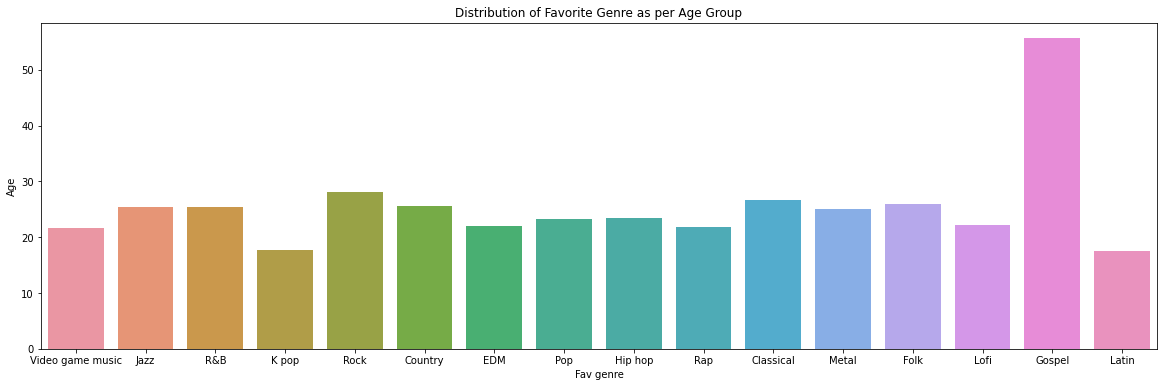

In [9]:
a= sns.barplot(data=df, x="Fav genre", y = "Age", ci = None)
a.figure.set_size_inches(20, 6)
plt.title("Distribution of Favorite Genre as per Age Group",size = 12)

#### 🟣 BPM VS GENRE
Different music genres suggest different beats per minutes and there is an obvious insight Country music has lesser beats per minutes compare the others.

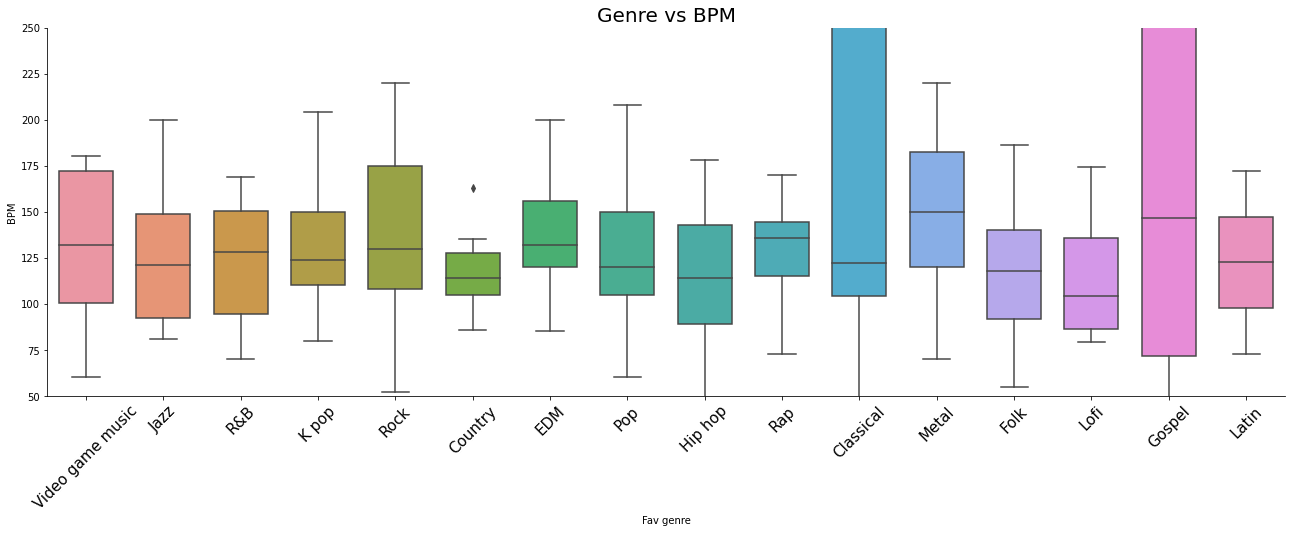

In [10]:
sns.catplot(data=df,
    x="Fav genre", y="BPM", kind="box",
    height=6, aspect=3,
    width = 0.7,
    showfliers=True)

plt.xticks(rotation = 45, size=15)
plt.title('Genre vs BPM', size= 20)
plt.ylim(50, 250)
plt.show()


#### 🟣 YES OR NO QUESTIONS COUNT
- While working - most of the respondents listen to music while working or studying
- Composer - most of the respondents are not composers
- Instrumentalist - about 210 out of 739 of the respondents play music regularly
- Exploratory - about 500 out of 739 of the respondents explore different music genre frequently
- Foreign Languages - about 60% of the respondents listen to foreign language music
- Permission - all the respondents have agreed to make their data public

<AxesSubplot:xlabel='Permissions', ylabel='count'>

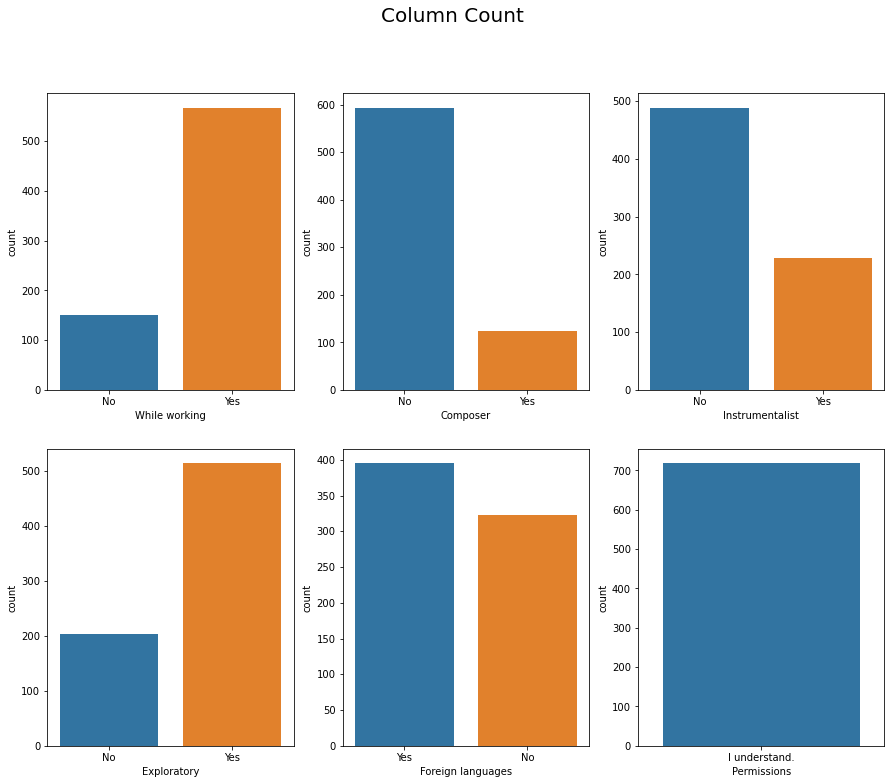

In [11]:
f, axes = plt.subplots(2, 3, figsize=(15, 12))
f.suptitle('Column Count', size = 20)
sns.countplot(ax=axes[0, 0], data=df, x="While working")
sns.countplot(ax=axes[0, 1], data=df, x="Composer")
sns.countplot(ax=axes[0, 2], data=df, x="Instrumentalist")
sns.countplot(ax=axes[1, 0], data=df, x="Exploratory")
sns.countplot(ax=axes[1, 1], data=df, x="Foreign languages")
sns.countplot(ax=axes[1, 2], data=df, x="Permissions")

#### 🟣 MENTAL HEALTH AND THE CORRESPONDING NUMBER OF SELF-REPORTS
The graphs implicates that out of the 4 mental conditions, people have scaled to have anxiety the most, followed by depression. Clearly, there are very less people who have self-reported to have OCD and insomnia.

<AxesSubplot:xlabel='OCD', ylabel='count'>

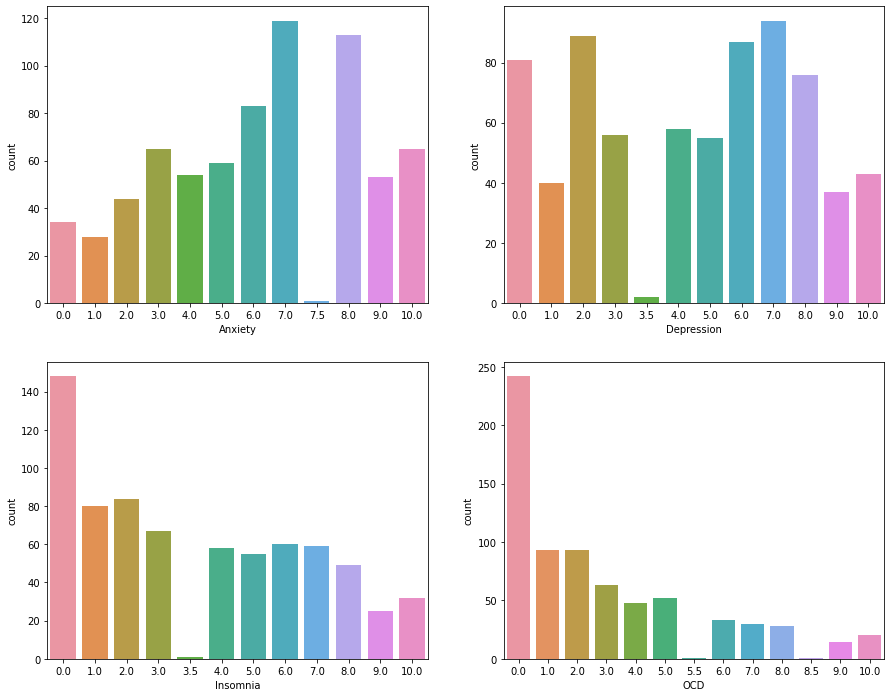

In [12]:
f, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.countplot(ax=axes[0, 0], data=df, x="Anxiety")
sns.countplot(ax=axes[0, 1], data=df, x="Depression")
sns.countplot(ax=axes[1, 0], data=df, x="Insomnia")
sns.countplot(ax=axes[1, 1], data=df, x="OCD")

#### 🟣 HOW FREQUENT THE RESPONDENTS LISTEN TO EACH GENRE
The bar graphs implies that the respondents listen more frequently to pop and rock music.

<AxesSubplot:xlabel='Frequency [Video game music]', ylabel='count'>

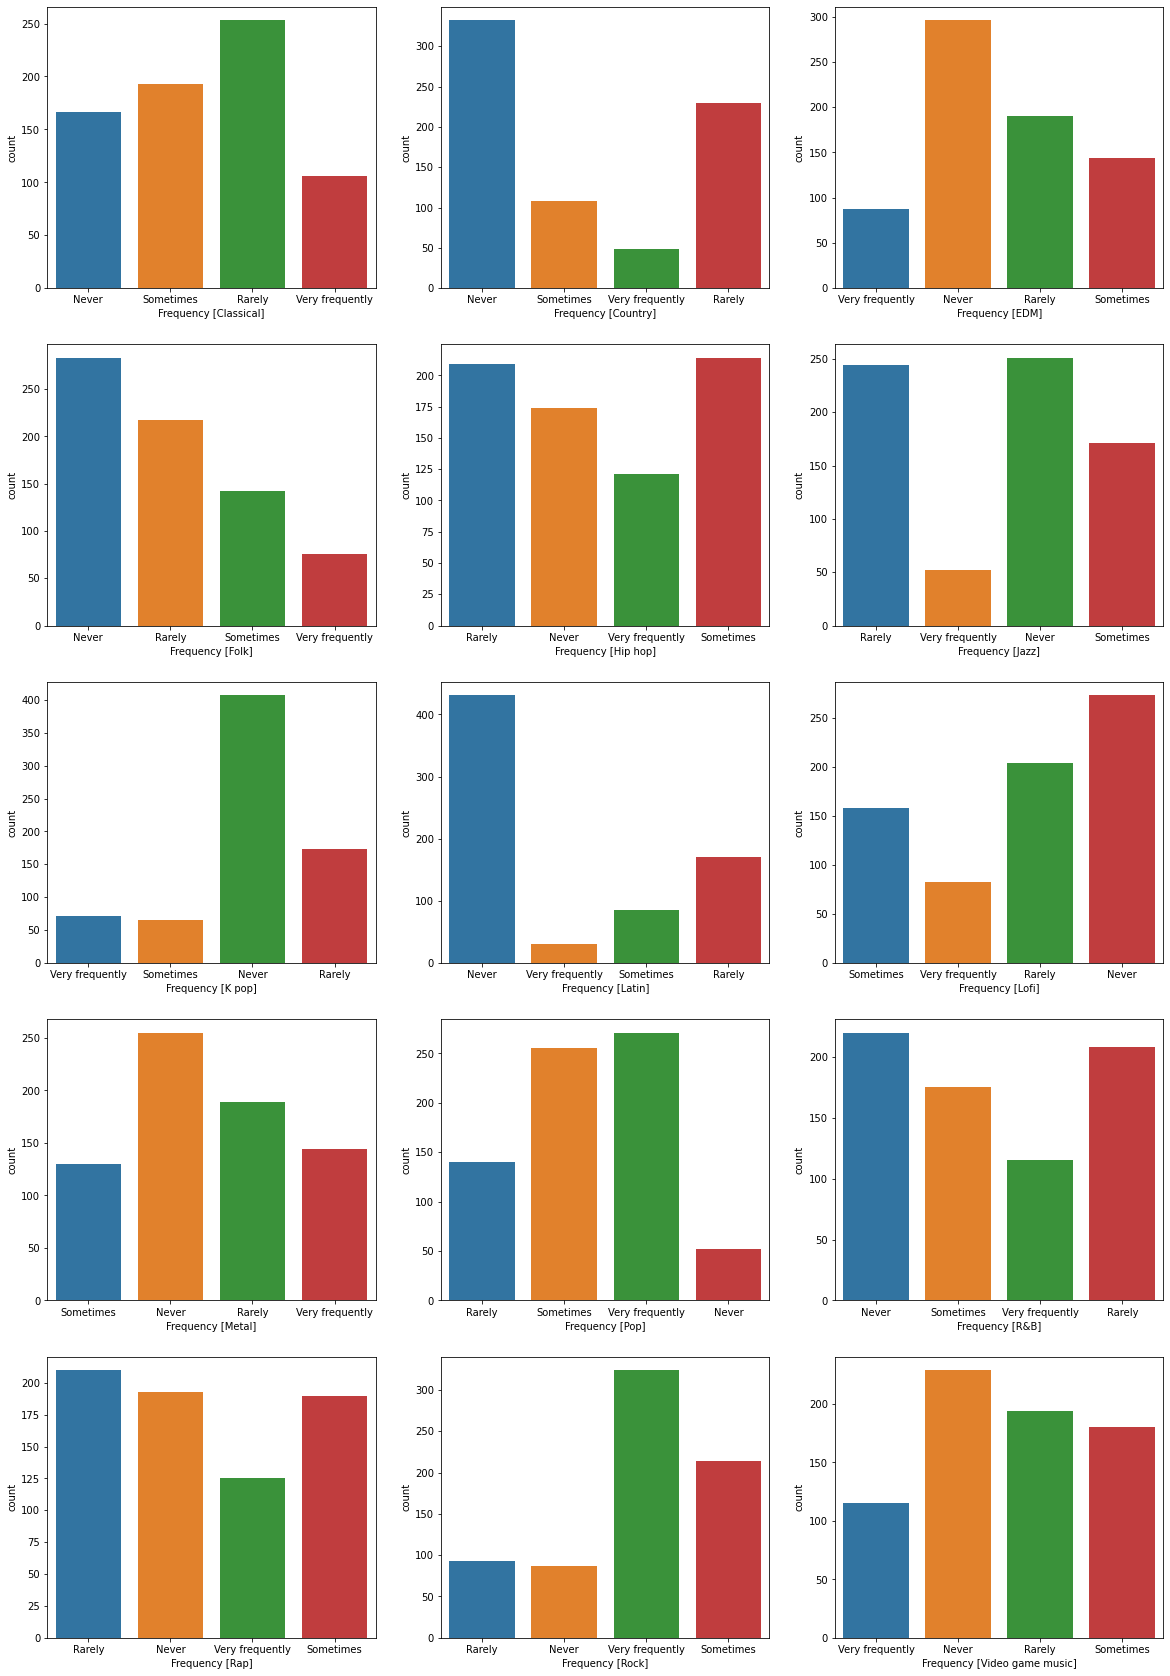

In [13]:
f, axes = plt.subplots(5, 3,figsize=(20,30))
sns.countplot(ax=axes[0, 0], data=df, x="Frequency [Classical]")
sns.countplot(ax=axes[0, 1], data=df, x="Frequency [Country]")
sns.countplot(ax=axes[0, 2], data=df, x="Frequency [EDM]")
sns.countplot(ax=axes[1, 0], data=df, x="Frequency [Folk]")
sns.countplot(ax=axes[1, 1], data=df, x="Frequency [Hip hop]")
sns.countplot(ax=axes[1, 2], data=df, x="Frequency [Jazz]")
sns.countplot(ax=axes[2, 0], data=df, x="Frequency [K pop]")
sns.countplot(ax=axes[2, 1], data=df, x="Frequency [Latin]")
sns.countplot(ax=axes[2, 2], data=df, x="Frequency [Lofi]")
sns.countplot(ax=axes[3, 0], data=df, x="Frequency [Metal]")
sns.countplot(ax=axes[3, 1], data=df, x="Frequency [Pop]")
sns.countplot(ax=axes[3, 2], data=df, x="Frequency [R&B]")
sns.countplot(ax=axes[4, 0], data=df, x="Frequency [Rap]")
sns.countplot(ax=axes[4, 1], data=df, x="Frequency [Rock]")
sns.countplot(ax=axes[4, 2], data=df, x="Frequency [Video game music]")

#### 🟣 DISTRIBUTION OF AGE
Using age brackets will help easily identify further and deeper analysis on the results.
Almost 80% of the respondents were aged from 10-30 years, 10% were 31-40 and, the rest of the 10% were 40 and above.

In [14]:
df.loc[df['Age']<=20, 'Age Group'] = '10-20'
df.loc[df['Age'].between(21,30), 'Age Group'] = '21-30'
df.loc[df['Age'].between(31,40), 'Age Group'] = '31-40'
df.loc[df['Age'].between(41,50), 'Age Group'] = '41-50'
df.loc[df['Age'].between(51,60), 'Age Group'] = '51-60'
df.loc[df['Age']>60, 'Age Group'] = '60+'

/Users/sarbjitmadra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/sarbjitmadra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Text(0.5, 1.0, 'Age Group Distribution')

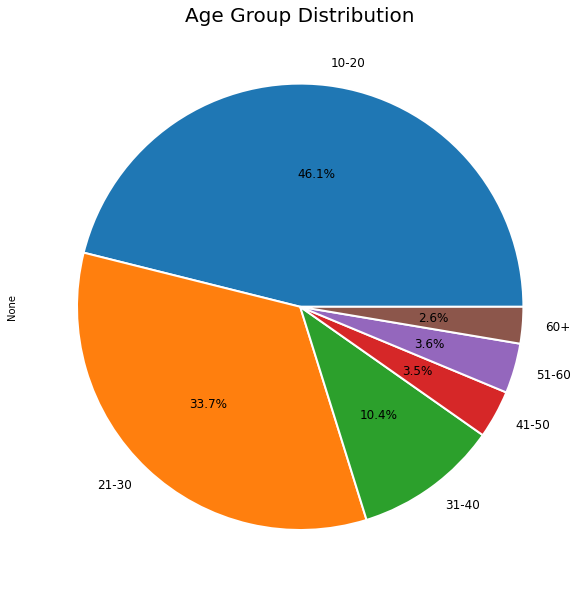

In [15]:
df.groupby('Age Group').size().plot(kind='pie', autopct='%.1f%%',figsize=(10, 12),textprops={'size': 'large'},wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.title('Age Group Distribution', size = 20)

Text(0.5, 1.0, 'Age Distribution')

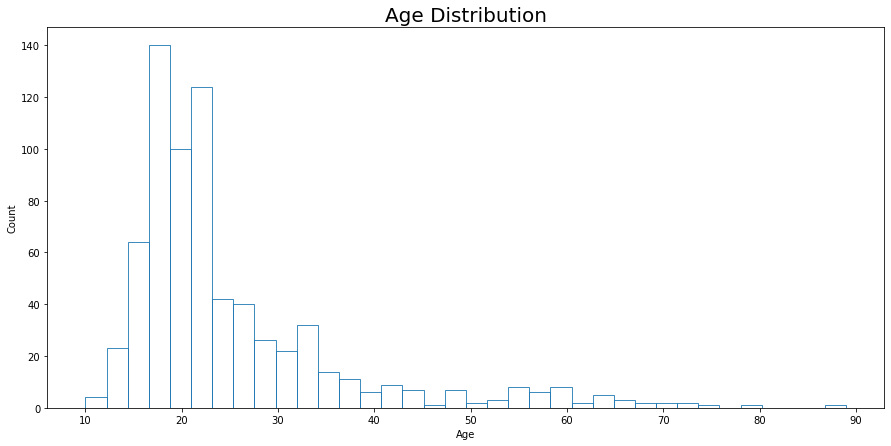

In [16]:
h= sns.histplot(data=df, x="Age", log_scale=False, element="bars", fill=False)
h.figure.set_size_inches(15, 7)
plt.title('Age Distribution', size = 20)

The graph suggests that most of the younger respondents chose Video game music, Pop, Metal, and Hiphop music. The older generation go for gospel, and classical music more. However, Rock music stands out the best for both the younger generatiion and for those aged 40 to 70 years.

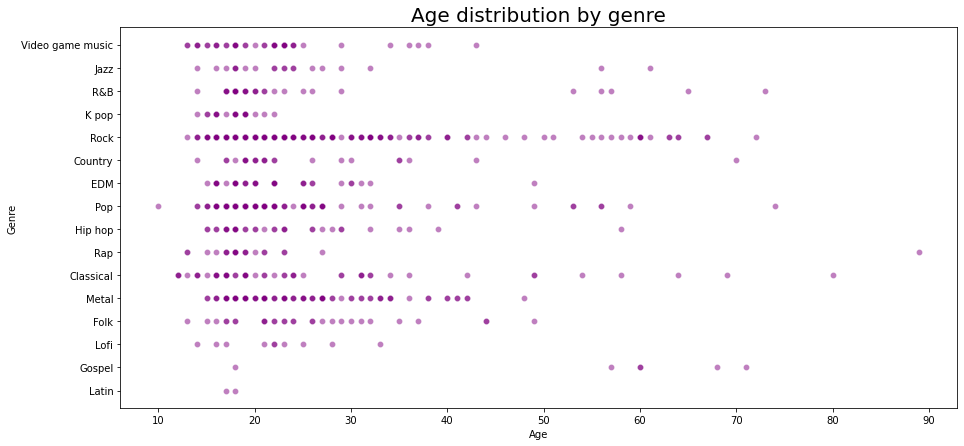

In [17]:
o = sns.scatterplot(data=df, y="Fav genre", x="Age", alpha = 0.5, marker = "o", color = "purple")
plt.ylabel("Genre")
plt.title('Age distribution by genre',size = 20)
o.figure.set_size_inches(15, 7)

#### 🟣 THE EFFECTS OF MUSIC ACCORDING TO AGE AND THE NUMBER OF HOURS A DAY THE RESPONDENTS LISTEN TO MUSIC
The graphs tells that listening to music about 2 to 6 hours a day for young individuals aging from 12-35 has improved their mental health.

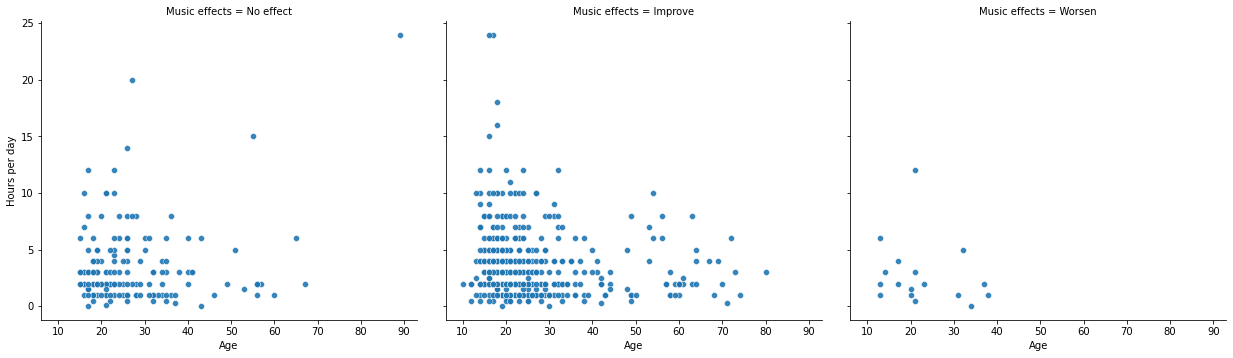

In [18]:
g = sns.FacetGrid(df, col="Music effects")
g.map(sns.scatterplot, "Age", "Hours per day", alpha=.9)
g.figure.set_size_inches(18, 6)

Text(0.5, 1.0, 'Music Effects on Mental Health Condition')

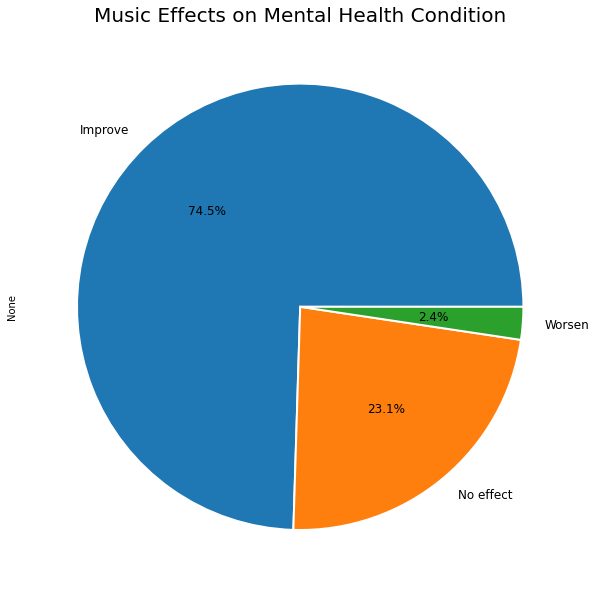

In [19]:
df.groupby('Music effects').size().plot(kind='pie', autopct='%.1f%%',figsize=(10, 12),textprops={'size': 'large'},wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.title('Music Effects on Mental Health Condition', size = 20)

#### 🟣 PERCENTAGE OF PRIMARY STREAMING SERVICES USAGE
Generally, the respondents favor to use Spotify (62.7%) as their primary streaming services while only 12.5% prefer Youtube music and 7% Apple Music. A few people (9.6%) don't use any streaming services and 6.8% prefer other services.

Text(0.5, 1.0, 'Primary Streaming Services')

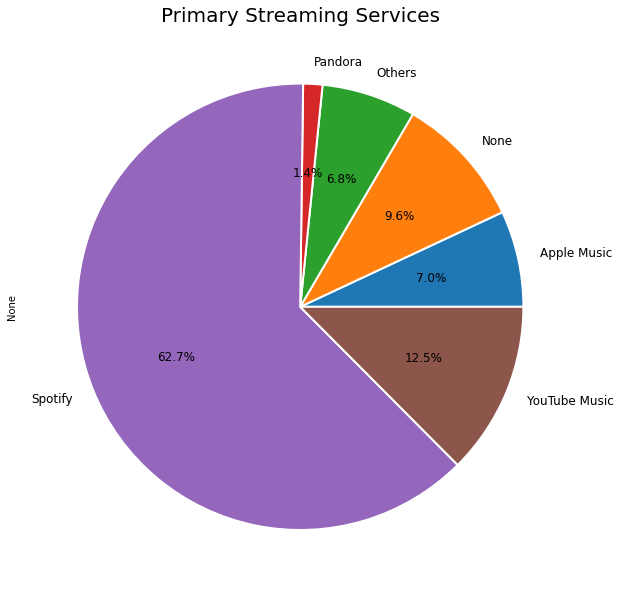

In [20]:
df.groupby('Primary streaming service').size().plot(kind='pie', autopct='%.1f%%',figsize=(10, 12),textprops={'size': 'large'},wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.title('Primary Streaming Services', size = 20)

#### 🟣 HOURS PER DAY A RESPONDENT ALLOCATES TO THE STREAMING SERVICES.
The catplot signifiest that the average respondent listens at about 3 hours a day on Spotify and other streaming services. Those listening through Youtube music, and Pandora have an average of 2 hours per day.

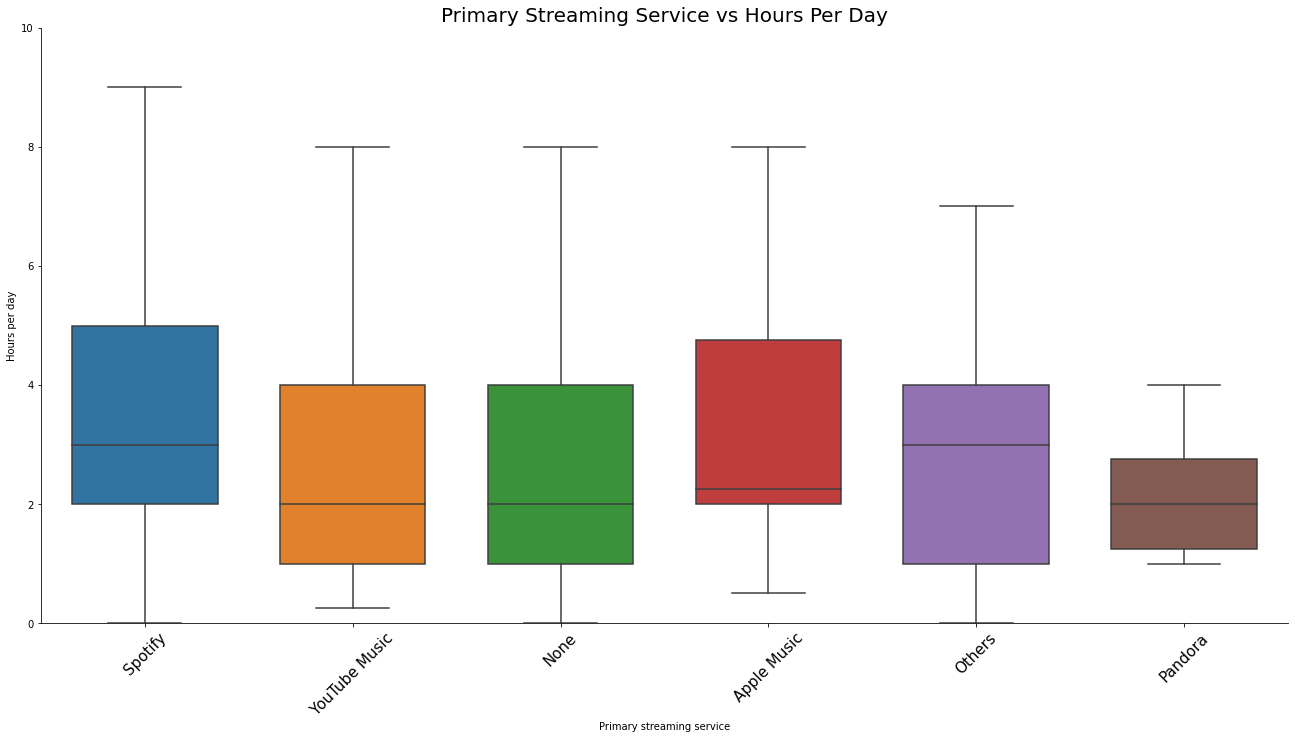

In [21]:
sns.catplot(data=df,
    x="Primary streaming service", y="Hours per day", kind="box",
    height=9, aspect=2,
    width = 0.7,
    showfliers=False)

plt.xticks(rotation = 45, size=15)
plt.title('Primary Streaming Service vs Hours Per Day', size= 20)
plt.ylim(0,10)
plt.show()

_____________

## 💥 Regression

#### Simple Regression Plots from Seaborn

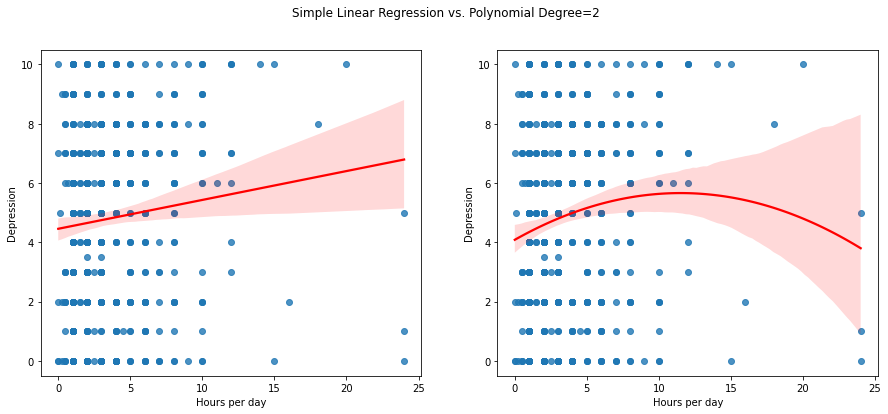

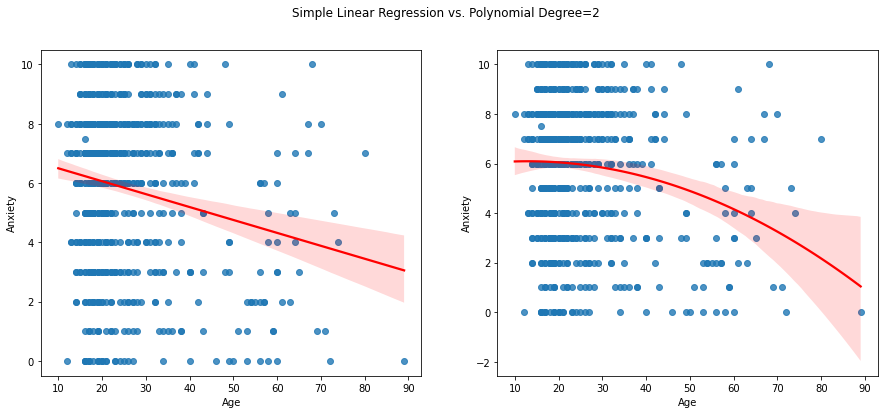

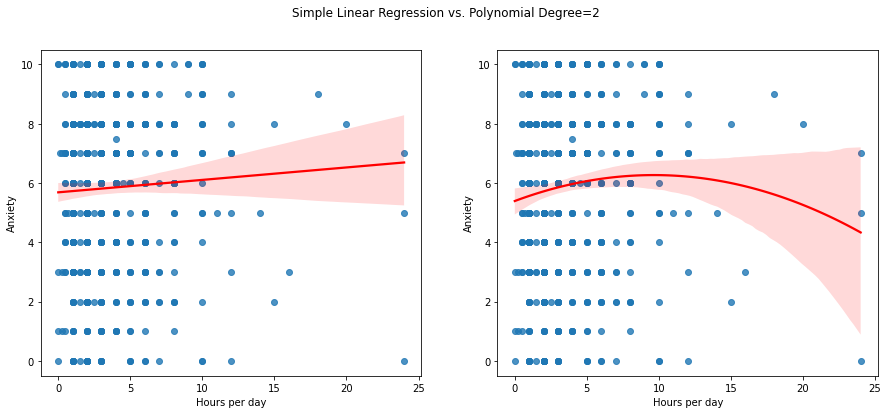

In [22]:
def regressionplot(feature_y, feature_x):
    fig, ax =plt.subplots(1,2)
    a= sns.regplot(y=feature_y, x=feature_x, data=df, fit_reg= True, line_kws={"color": "red"}, ax=ax[0])
    a.figure.set_size_inches(15, 6)
    b=sns.regplot(y=feature_y,x=feature_x, data=df, fit_reg= True, line_kws={"color": "red"}, ax=ax[1], order=2)
    b.figure.set_size_inches(15, 6)
    fig.suptitle("Simple Linear Regression vs. Polynomial Degree=2")
    return plt.show()
    
regressionplot("Depression","Hours per day")
regressionplot("Anxiety","Age")    
regressionplot("Anxiety","Hours per day")

## 💥 Model Creation

### 💎 ANXIETY

Finding the variable/s that relate to the self-reported anxiety of a respondent.

In [23]:
# MODEL 1

x = df["Fav genre"]
y = df["Anxiety"]
x= pd.get_dummies(data=x, columns=["Fav genre"],drop_first=True)

est = sm.OLS(y,x).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Anxiety   R-squared (uncentered):                   0.779
Model:                            OLS   Adj. R-squared (uncentered):              0.774
Method:                 Least Squares   F-statistic:                              217.7
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                   3.49e-252
Time:                        17:31:37   Log-Likelihood:                         -1816.9
No. Observations:                 718   AIC:                                      3664.
Df Residuals:                     703   BIC:                                      3732.
Df Model:                          15                                                  
Covariance Type:                  HC2                                                  
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Country              5.2500      0.606      8.668      0.000       4.063       6.437
EDM                  5.3611      0.559      9.583      0.000       4.265       6.458
Folk                 6.6897      0.479     13.970      0.000       5.751       7.628
Gospel               4.8333      1.302      3.713      0.000       2.282       7.385
Hip hop              6.1176      0.417     14.655      0.000       5.299       6.936
Jazz                 5.9000      0.636      9.274      0.000       4.653       7.147
K pop                6.5238      0.481     13.558      0.000       5.581       7.467
Latin                5.0000      5.000      1.000      0.317      -4.800      14.800
Lofi                 6.1000      0.657      9.278      0.000       4.811       7.389
Metal                5.7471      0.321     17.910      0.000       5.118       6.376
Pop                  6.0746      0.224     27.113      0.000       5.635       6.514
R&B                  5.1714      0.470     11.001      0.000       4.250       6.093
Rap                  5.0909      0.613      8.300      0.000       3.889       6.293
Rock                 6.1304      0.213     28.827      0.000       5.714       6.547
Video game music     5.8605      0.377     15.531      0.000       5.121       6.600
==============================================================================
Omnibus:                        1.083   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                1.126
Skew:                          -0.037   Prob(JB):                        0.569
Kurtosis:                       2.821   Cond. No.                         9.59
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC2)
"""

In [24]:
# MODEL 2 

y = df["Anxiety"]
x = df[['Hours per day','Age Group','While working','Instrumentalist', 'Fav genre', 'Foreign languages']]
x= pd.get_dummies(data=x, columns=['While working','Instrumentalist', 'Fav genre', 'Foreign languages', 'Age Group'],drop_first=True)

est = sm.OLS(y,x).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Anxiety   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                              142.9
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                   9.32e-250
Time:                        17:31:37   Log-Likelihood:                         -1762.0
No. Observations:                 718   AIC:                                      3572.
Df Residuals:                     694   BIC:                                      3682.
Df Model:                          24                                                  
Covariance Type:                  HC2                                                  
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Hours per day                  0.0870      0.042      2.082      0.037       0.005       0.169
While working_Yes              0.8839      0.284      3.112      0.002       0.327       1.441
Instrumentalist_Yes            1.0684      0.245      4.352      0.000       0.587       1.550
Fav genre_Country              3.5543      0.669      5.313      0.000       2.243       4.865
Fav genre_EDM                  3.3849      0.622      5.438      0.000       2.165       4.605
Fav genre_Folk                 4.5132      0.564      7.997      0.000       3.407       5.619
Fav genre_Gospel               4.5729      1.752      2.610      0.009       1.139       8.007
Fav genre_Hip hop              4.3419      0.491      8.841      0.000       3.379       5.304
Fav genre_Jazz                 3.4310      0.637      5.385      0.000       2.182       4.680
Fav genre_K pop                4.4488      0.573      7.759      0.000       3.325       5.573
Fav genre_Latin                2.0393      5.074      0.402      0.688      -7.905      11.984
Fav genre_Lofi                 3.6544      0.672      5.440      0.000       2.338       4.971
Fav genre_Metal                3.5359      0.436      8.113      0.000       2.682       4.390
Fav genre_Pop                  4.3457      0.338     12.858      0.000       3.683       5.008
Fav genre_R&B                  3.7044      0.513      7.224      0.000       2.699       4.710
Fav genre_Rap                  3.2449      0.696      4.664      0.000       1.881       4.609
Fav genre_Rock                 4.3641      0.344     12.701      0.000       3.691       5.038
Fav genre_Video game music     3.7654      0.481      7.835      0.000       2.824       4.707
Foreign languages_Yes          0.5377      0.227      2.370      0.018       0.093       0.982
Age Group_21-30                0.8297      0.240      3.459      0.001       0.360       1.300
Age Group_31-40                0.5455      0.383      1.425      0.154      -0.205       1.296
Age Group_41-50                0.6000      0.674      0.890      0.374      -0.722       1.922
Age Group_51-60               -2.5417      0.503     -5.048      0.000      -3.528      -1.555
Age Group_60+                 -0.3761      0.910     -0.413      0.680      -2.160       1.408
==============================================================================
Omnibus:                       16.413   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.906
Skew:                          -0.298   Prob(JB):                     0.000580
Kurtosis:                       2.623   Cond. No.                         92.2
========================

#### CONCLUSION
The first model has a R-squared of 77.9% and p-values lower than 0.05 which which implies there is a statistical significance between the two varibales. A person's favorite music genre has a strong correlation to his or her self-reported anxiety level. Music genres like Folk music, Kpop, Hiphop, Lofi, Rock and Pop has a positive effect on the anxiety level of the respondent which means that the more they listen to these types of music, the higher the chances of their anxiety levels to increase.


The second model has a R-squared of 81% by using different predictors (multiple regression) which implies that different factors may have different impacts on a persons anxiety level. Respondents who are listening to music while working or studying, who are instrumentalists, who are listening to foreign language music and are in their 51-60s have lesser chances of having higher levels of anxiety compared to the others.

### 💎 DEPRESSION

Finding the variable/s that relate to the self-reported depression of a respondent.

In [25]:
# Model 1
x = df["Fav genre"]
y = df["Depression"]
x= pd.get_dummies(data=x, columns=["Fav genre"],drop_first=True)

est = sm.OLS(y,x).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Depression   R-squared (uncentered):                   0.693
Model:                            OLS   Adj. R-squared (uncentered):              0.686
Method:                 Least Squares   F-statistic:                              122.9
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                   8.26e-185
Time:                        17:31:37   Log-Likelihood:                         -1841.5
No. Observations:                 718   AIC:                                      3713.
Df Residuals:                     703   BIC:                                      3782.
Df Model:                          15                                                  
Covariance Type:                  HC2                                                  
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Country              4.1667      0.645      6.464      0.000       2.903       5.430
EDM                  5.1111      0.508     10.055      0.000       4.115       6.107
Folk                 5.1379      0.550      9.345      0.000       4.060       6.216
Gospel               2.6667      1.606      1.661      0.097      -0.480       5.813
Hip hop              5.8824      0.462     12.731      0.000       4.977       6.788
Jazz                 4.5000      0.716      6.282      0.000       3.096       5.904
K pop                3.9048      0.647      6.035      0.000       2.637       5.173
Latin                4.5000      1.500      3.000      0.003       1.560       7.440
Lofi                 6.6000      0.980      6.736      0.000       4.680       8.520
Metal                5.0575      0.319     15.861      0.000       4.433       5.682
Pop                  4.4868      0.248     18.127      0.000       4.002       4.972
R&B                  3.8286      0.529      7.238      0.000       2.792       4.865
Rap                  4.0000      0.661      6.049      0.000       2.704       5.296
Rock                 5.3125      0.231     23.020      0.000       4.860       5.765
Video game music     4.5814      0.420     10.910      0.000       3.758       5.404
==============================================================================
Omnibus:                       26.039   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.835
Skew:                           0.097   Prob(JB):                      0.00163
Kurtosis:                       2.374   Cond. No.                         9.59
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC2)
"""

In [26]:
# MODEL 2 

y = df["Depression"]
x = df[['Hours per day','BPM','Age','Frequency [Lofi]','Frequency [Gospel]','While working','Instrumentalist', 'Fav genre', 'Foreign languages']]
x= pd.get_dummies(data=x, columns=['While working','Frequency [Lofi]','Frequency [Gospel]','Instrumentalist', 'Fav genre', 'Foreign languages'],drop_first=True)

est = sm.OLS(y,x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Depression   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.712
Method:                 Least Squares   F-statistic:                              66.72
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                   2.21e-172
Time:                        17:31:37   Log-Likelihood:                         -1804.8
No. Observations:                 718   AIC:                                      3664.
Df Residuals:                     691   BIC:                                      3787.
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Hours per day                          0.0985      0.041      2.422      0.016       0.019       0.178
BPM                                  3.95e-09    3.1e-09      1.274      0.203   -2.14e-09       1e-08
Age                                    0.0076      0.009      0.856      0.392      -0.010       0.025
While working_Yes                      0.6415      0.291      2.202      0.028       0.069       1.214
Frequency [Lofi]_Rarely                0.5467      0.293      1.868      0.062      -0.028       1.121
Frequency [Lofi]_Sometimes             0.7176      0.323      2.221      0.027       0.083       1.352
Frequency [Lofi]_Very frequently      -0.2015      0.426     -0.473      0.637      -1.038       0.635
Frequency [Gospel]_Rarely              0.2649      0.307      0.863      0.388      -0.338       0.867
Frequency [Gospel]_Sometimes           0.3566      0.465      0.766      0.444      -0.557       1.270
Frequency [Gospel]_Very frequently     0.0554      0.998      0.056      0.956      -1.905       2.016
Instrumentalist_Yes                    0.6629      0.247      2.683      0.007       0.178       1.148
Fav genre_Country                      2.5709      0.678      3.793      0.000       1.240       3.902
Fav genre_EDM                          3.0553      0.592      5.157      0.000       1.892       4.218
Fav genre_Folk                         2.9433      0.654      4.498      0.000       1.659       4.228
Fav genre_Gospel                       0.8408      1.566      0.537      0.591      -2.233       3.915
Fav genre_Hip hop                      3.8620      0.608      6.348      0.000       2.668       5.056
Fav genre_Jazz                         1.8942      0.774      2.447      0.015       0.375       3.414
Fav genre_K pop                        1.5186      0.748      2.031      0.043       0.050       2.987
Fav genre_Latin                        1.0687      2.206      0.485      0.628      -3.262       5.400
Fav genre_Lofi                         4.7712      1.091      4.374      0.000       2.630       6.913
Fav genre_Metal                        3.0659      0.441      6.955      0.000       2.200       3.931
Fav genre_Pop                          2.5414      0.409      6.209      0.000       1.738       3.345
Fav genre_R&B                          1.7592      0.610      2.883      0.004       0.561       2.957
Fav genre_Rap                          1.7893      0.725      2.467      0.014       0.365       3.213
Fav genre_Rock                         3.4080      0.380      8.979      0.000       2.663       4.153
Fav genre_Video game music             2.5809      0.562      4.589      0.000       1.477       3.6

#### CONCLUSION

The first model has a R-squared of 69.3% and p-values lower than 0.05. This model tells us that listening to Lofi escalates the chances of a person to suffer more from depression. For one unit increase in Lofi music, there is a 6.6 unit increase in the depression level.


The second model has a R-squared of 72.3% with the use of multiple predictors. Factors like BPM, Age, Frequency [Lofi] Very frequently, Frequency [Gospel] Very frequently, Fav genre_Gospel, and Fav genre_Latin have p-values higher than 0.05 which suggests that evidences are not strong enough to conclude an assumption.

### 💎 INSOMNIA

Finding the variable/s that relate to the self-reported insomnia of a respondent.

In [27]:
y = df["Insomnia"]
x = df[['Hours per day','Age Group','Anxiety', 'Depression','OCD']]
x= pd.get_dummies(data=x, columns=['Age Group'],drop_first=True)

est = sm.OLS(y,x).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Insomnia   R-squared (uncentered):                   0.667
Model:                            OLS   Adj. R-squared (uncentered):              0.663
Method:                 Least Squares   F-statistic:                              145.2
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                   2.13e-154
Time:                        17:31:37   Log-Likelihood:                         -1754.7
No. Observations:                 718   AIC:                                      3527.
Df Residuals:                     709   BIC:                                      3569.
Df Model:                           9                                                  
Covariance Type:                  HC2                                                  
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Hours per day       0.1308      0.040      3.289      0.001       0.053       0.209
Anxiety             0.1650      0.040      4.078      0.000       0.086       0.244
Depression          0.3354      0.042      7.898      0.000       0.252       0.419
OCD                 0.1528      0.043      3.577      0.000       0.069       0.237
Age Group_21-30    -0.0903      0.227     -0.398      0.691      -0.536       0.355
Age Group_31-40     0.9069      0.387      2.342      0.019       0.148       1.666
Age Group_41-50     1.2200      0.620      1.966      0.049       0.004       2.436
Age Group_51-60     1.4516      0.620      2.341      0.019       0.236       2.667
Age Group_60+       0.6649      0.666      0.999      0.318      -0.640       1.970
==============================================================================
Omnibus:                       20.317   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.139
Skew:                           0.329   Prob(JB):                     0.000115
Kurtosis:                       2.585   Cond. No.                         60.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC2)
"""

#### CONCLUSION
The multiple regression model has a R-squared of 66.7% and p-values lower than 0.05 except for age group of 21-30 and 60+. The model is telling us that Insomnia has a statistical significance with Anxiety, Depression and OCD.

### 💎 OCD

Finding the variable/s that relate to the self-reported OCD of a respondent.

In [28]:
y = df["OCD"]
x = df[["Fav genre"]]
x= pd.get_dummies(data=x, columns=["Fav genre"],drop_first=True)

est = sm.OLS(y,x).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    OCD   R-squared (uncentered):                   0.442
Model:                            OLS   Adj. R-squared (uncentered):              0.430
Method:                 Least Squares   F-statistic:                              37.96
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                    3.02e-80
Time:                        17:31:37   Log-Likelihood:                         -1782.0
No. Observations:                 718   AIC:                                      3594.
Df Residuals:                     703   BIC:                                      3663.
Df Model:                          15                                                  
Covariance Type:                  HC2                                                  
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Fav genre_Country              2.5833      0.474      5.454      0.000       1.655       3.512
Fav genre_EDM                  2.8889      0.518      5.581      0.000       1.874       3.903
Fav genre_Folk                 2.2759      0.503      4.521      0.000       1.289       3.263
Fav genre_Gospel               0.3333      0.333      1.000      0.317      -0.320       0.987
Fav genre_Hip hop              2.5882      0.451      5.739      0.000       1.704       3.472
Fav genre_Jazz                 2.8000      0.639      4.381      0.000       1.547       4.053
Fav genre_K pop                2.4762      0.653      3.790      0.000       1.196       3.757
Fav genre_Latin                2.5000      2.500      1.000      0.317      -2.400       7.400
Fav genre_Lofi                 3.4000      1.118      3.042      0.002       1.210       5.590
Fav genre_Metal                2.3678      0.299      7.911      0.000       1.781       2.954
Fav genre_Pop                  2.8553      0.287      9.954      0.000       2.293       3.417
Fav genre_R&B                  2.7429      0.477      5.751      0.000       1.808       3.678
Fav genre_Rap                  3.1818      0.598      5.320      0.000       2.010       4.354
Fav genre_Rock                 2.7201      0.222     12.229      0.000       2.284       3.156
Fav genre_Video game music     2.4186      0.394      6.137      0.000       1.646       3.191
==============================================================================
Omnibus:                       70.495   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.167
Skew:                           0.846   Prob(JB):                     7.16e-20
Kurtosis:                       2.704   Cond. No.                         9.59
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC2)
"""

#### CONCLUSION
After playing with the data and adding multiple regression, the best r-squared was 54.7% but most of the p-values were
higher than 0.05 which implies there is not enough evidence to draw a conclusion. The closest best model was 44.2% which is still not a good result, meaning that 55.8% of the data's outcome cannot be explained by the model.

### 💎 Music effects

Using classification model to determine the effects of music on the respondents with different predictors.

In [29]:
y = df["Music effects"]
X = df[['Hours per day','Age Group','While working','Instrumentalist', 'Fav genre', 'Foreign languages']]
X= pd.get_dummies(data=X, columns=['While working','Instrumentalist', 'Fav genre', 'Foreign languages', 'Age Group'],drop_first=True)

In [30]:
X_training_data, X_testing_data, y_training_data, y_testing_data = train_test_split(X, y, test_size=0.35, random_state=0)
logreg = LogisticRegression(multi_class = "multinomial", max_iter = 4000)
logreg.fit(X_training_data, y_training_data)


LogisticRegression(max_iter=4000, multi_class='multinomial')

In [31]:
y_pred = logreg.predict(X_testing_data)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_training_data, y_training_data)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_testing_data, y_testing_data)))

Accuracy of logistic regression classifier on test set: 0.76
Accuracy of logistic regression classifier on train set: 0.73


In [32]:
print(confusion_matrix(y_testing_data,y_pred))

[[179   5   0]
 [ 57   5   0]
 [  5   1   0]]


In [33]:
print(classification_report(y_testing_data,y_pred))

              precision    recall  f1-score   support

     Improve       0.74      0.97      0.84       184
   No effect       0.45      0.08      0.14        62
      Worsen       0.00      0.00      0.00         6

    accuracy                           0.73       252
   macro avg       0.40      0.35      0.33       252
weighted avg       0.65      0.73      0.65       252



/Users/sarbjitmadra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarbjitmadra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarbjitmadra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

#### CONCLUSION
The classification report shows that the model has a 73% chance that it will predict accurately. Looking at the support section of the report, it is evident that there is sampling imbalance. The model was able to train more on data that contained "Improve" compared to the others which means that it can correctly predict it with a precision rate of 74%. For "No effect", there is a 45% accuracy that it will predict it correctly which is also not so good and more so, for "Worsen", the model will not be able to predict it at all. The best way to improve this model is to gather more sample data for the two other classes.